In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [485]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [486]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185777 entries, 0 to 1185776
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1185777 non-null  int64  
 1   kWh       1185777 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 18.1 MB


In [487]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1185772    0.19
1185773    0.19
1185774    0.19
1185775    0.20
1185776    0.20
Name: kWh, Length: 1185777, dtype: float64

In [488]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1185772    0.19
1185773    0.19
1185774    0.19
1185775    0.20
1185776    0.20
Name: kWh, Length: 1185777, dtype: float64

In [489]:
l=len(conso_data)-1
l

1185776

In [490]:
conso_data['sec']=conso_data['Interval']/1000


In [491]:
conso_data['Wh']=3600000/conso_data['Interval']


In [492]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [493]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185777 entries, 0 to 1185776
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1185777 non-null  int64  
 1   kWh        1185777 non-null  float64
 2   sec        1185777 non-null  float64
 3   Wh         1185777 non-null  float64
 4   cumul(ms)  1185777 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 45.2 MB


In [494]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1185772,18653,0.19,18.653,192.998445,27877155668
1185773,18483,0.19,18.483,194.773576,27877174151
1185774,18573,0.19,18.573,193.829753,27877192724
1185775,17944,0.20,17.944,200.624164,27877210668
1185776,18142,0.20,18.142,198.434572,27877228810


In [495]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

27877228810000

In [496]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 59, 3, 929717)

In [497]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [498]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [499]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [500]:
conso_data['dates']

0         2023-08-21 18:59:25.863717
1         2023-08-21 18:59:47.721717
2         2023-08-21 19:00:09.722717
3         2023-08-21 19:00:31.650717
4         2023-08-21 19:00:53.541717
                     ...            
1185772   2024-07-09 10:38:19.597717
1185773   2024-07-09 10:38:38.080717
1185774   2024-07-09 10:38:56.653717
1185775   2024-07-09 10:39:14.597717
1185776   2024-07-09 10:39:32.739717
Name: dates, Length: 1185777, dtype: datetime64[ns]

In [501]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:59:25.863717,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:59:47.721717,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:00:09.722717,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:00:31.650717,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:00:53.541717,21/08/23
...,...,...,...,...,...,...,...
1185772,18653,0.19,18.653,192.998445,27877155668,2024-07-09 10:38:19.597717,09/07/24
1185773,18483,0.19,18.483,194.773576,27877174151,2024-07-09 10:38:38.080717,09/07/24
1185774,18573,0.19,18.573,193.829753,27877192724,2024-07-09 10:38:56.653717,09/07/24
1185775,17944,0.20,17.944,200.624164,27877210668,2024-07-09 10:39:14.597717,09/07/24


In [502]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('09/07/24', 9, 7, 2024)

In [503]:
here = now.strftime('%H:%M:%S')
here

'10:39:50'

In [504]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [505]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 1184463 to 1185776
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1314 non-null   int64         
 1   kWh        1314 non-null   float64       
 2   sec        1314 non-null   float64       
 3   Wh         1314 non-null   float64       
 4   cumul(ms)  1314 non-null   int64         
 5   dates      1314 non-null   datetime64[ns]
 6   days       1314 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 82.1+ KB


In [506]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [507]:
data = list(df_grp['kWh'])
print(data)


[0.847, 3.7, 4.231, 3.686, 4.19, 4.616, 3.513, 3.405, 3.522, 3.691, 3.791, 3.767, 4.258, 3.819, 3.449, 3.64, 3.325, 3.374, 4.303, 3.999, 4.05, 3.921, 3.438, 4.469, 3.725, 3.761, 4.403, 4.669, 3.788, 3.216, 3.179, 4.013, 3.659, 3.177, 3.793, 4.168, 3.742, 3.567, 4.786, 4.178, 4.551, 3.77, 3.4, 4.31, 3.873, 3.872, 3.431, 4.082, 3.653, 3.399, 4.131, 3.383, 3.892, 3.835, 3.643, 3.748, 4.243, 3.301, 3.871, 2.973, 2.055, 2.046, 2.457, 4.09, 3.725, 4.332, 3.626, 3.906, 3.747, 3.933, 3.97, 4.122, 3.636, 3.162, 3.803, 3.508, 3.63, 3.705, 3.686, 3.235, 3.911, 3.26, 3.749, 3.597, 4.087, 3.607, 3.342, 3.824, 4.059, 4.385, 4.081, 3.998, 4.226, 3.749, 3.923, 3.868, 3.913, 3.747, 4.04, 4.345, 3.887, 3.503, 3.683, 3.674, 3.341, 3.849, 3.992, 4.106, 3.474, 4.174, 3.608, 4.094, 4.519, 3.685, 3.428, 3.574, 4.178, 3.681, 4.081, 3.982, 3.743, 3.593, 5.131, 3.695, 3.766, 4.299, 4.095, 4.744, 4.388, 3.974, 3.787, 4.361, 4.674, 4.206, 4.784, 4.331, 3.702, 4.2, 3.698, 3.629, 3.523, 3.957, 3.664, 3.787, 3.581, 

In [508]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [509]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [510]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [511]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.308844
dtype: float64

In [512]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.659806
dtype: float64

In [513]:
last=df_grp.iloc[-1]['kWh']
last

1.314

In [514]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 1184463 to 1185776
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1314 non-null   int64         
 1   kWh        1314 non-null   float64       
 2   sec        1314 non-null   float64       
 3   Wh         1314 non-null   float64       
 4   cumul(ms)  1314 non-null   int64         
 5   dates      1314 non-null   datetime64[ns]
 6   days       1314 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 82.1+ KB


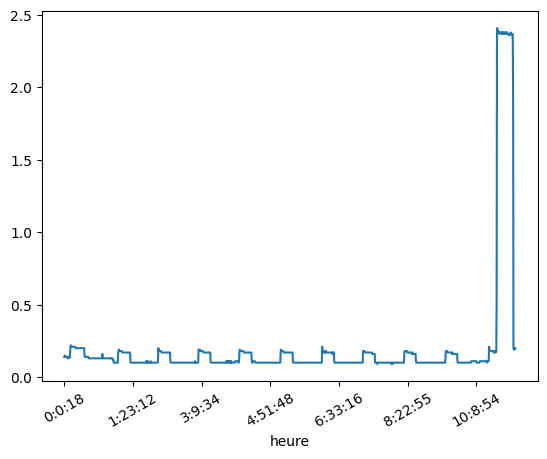

In [515]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [516]:
conso_day['heure']


1184463      0:0:18
1184464      0:0:43
1184465       0:1:8
1184466      0:1:32
1184467      0:1:58
             ...   
1185772    10:38:19
1185773    10:38:38
1185774    10:38:56
1185775    10:39:14
1185776    10:39:32
Name: heure, Length: 1314, dtype: object

In [517]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:18',
              days   kWh
  heure                 
  0:0:18  09/07/24  0.14),
 ('0:0:43',
              days   kWh
  heure                 
  0:0:43  09/07/24  0.14),
 ('0:1:8',
             days   kWh
  heure                
  0:1:8  09/07/24  0.15),
 ('0:1:32',
              days   kWh
  heure                 
  0:1:32  09/07/24  0.14),
 ('0:1:58',
              days   kWh
  heure                 
  0:1:58  09/07/24  0.14),
 ('0:2:24',
              days   kWh
  heure                 
  0:2:24  09/07/24  0.14),
 ('0:2:50',
              days   kWh
  heure                 
  0:2:50  09/07/24  0.14),
 ('0:3:16',
              days   kWh
  heure                 
  0:3:16  09/07/24  0.14),
 ('0:3:42',
              days   kWh
  heure                 
  0:3:42  09/07/24  0.14),
 ('0:4:8',
             days   kWh
  heure                
  0:4:8  09/07/24  0.14),
 ('0:4:35',
              days   kWh
  heure                 
  0:4:35  09/07/24  0.13),
 ('0:5:1',
             days 

In [518]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:18',
  heure
  0:0:18    0.14
  Name: kWh, dtype: float64),
 ('0:0:43',
  heure
  0:0:43    0.14
  Name: kWh, dtype: float64),
 ('0:1:8',
  heure
  0:1:8    0.15
  Name: kWh, dtype: float64),
 ('0:1:32',
  heure
  0:1:32    0.14
  Name: kWh, dtype: float64),
 ('0:1:58',
  heure
  0:1:58    0.14
  Name: kWh, dtype: float64),
 ('0:2:24',
  heure
  0:2:24    0.14
  Name: kWh, dtype: float64),
 ('0:2:50',
  heure
  0:2:50    0.14
  Name: kWh, dtype: float64),
 ('0:3:16',
  heure
  0:3:16    0.14
  Name: kWh, dtype: float64),
 ('0:3:42',
  heure
  0:3:42    0.14
  Name: kWh, dtype: float64),
 ('0:4:8',
  heure
  0:4:8    0.14
  Name: kWh, dtype: float64),
 ('0:4:35',
  heure
  0:4:35    0.13
  Name: kWh, dtype: float64),
 ('0:5:1',
  heure
  0:5:1    0.14
  Name: kWh, dtype: float64),
 ('0:5:28',
  heure
  0:5:28    0.14
  Name: kWh, dtype: float64),
 ('0:5:54',
  heure
  0:5:54    0.14
  Name: kWh, dtype: float64),
 ('0:6:21',
  heure
  0:6:21    0.13
  Name: kWh, dtype: float64),
 

In [519]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:18,26227,0.14,26.227,137.263126,27838874180,2024-07-09 00:00:18.109717,09/07/24
0:0:43,25741,0.14,25.741,139.854706,27838899921,2024-07-09 00:00:43.850717,09/07/24
0:1:8,24404,0.15,24.404,147.516801,27838924325,2024-07-09 00:01:08.254717,09/07/24
0:1:32,24666,0.14,24.666,145.949891,27838948991,2024-07-09 00:01:32.920717,09/07/24
0:1:58,25244,0.14,25.244,142.608145,27838974235,2024-07-09 00:01:58.164717,09/07/24
...,...,...,...,...,...,...,...
10:38:19,18653,0.19,18.653,192.998445,27877155668,2024-07-09 10:38:19.597717,09/07/24
10:38:38,18483,0.19,18.483,194.773576,27877174151,2024-07-09 10:38:38.080717,09/07/24
10:38:56,18573,0.19,18.573,193.829753,27877192724,2024-07-09 10:38:56.653717,09/07/24


In [520]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [521]:
df.iloc[0].dates

Timestamp('2024-07-09 00:00:18.109717')

In [522]:
df.dates.dt.time

heure
0:0:18      00:00:18.109717
0:0:43      00:00:43.850717
0:1:8       00:01:08.254717
0:1:32      00:01:32.920717
0:1:58      00:01:58.164717
                 ...       
10:38:19    10:38:19.597717
10:38:38    10:38:38.080717
10:38:56    10:38:56.653717
10:39:14    10:39:14.597717
10:39:32    10:39:32.739717
Name: dates, Length: 1314, dtype: object

In [523]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [524]:
tranches = len(df)//1000
tranches+1

2

In [525]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-07-09 00:00:18.109717	2024-07-09 08:22:35.252717	8h 22m 17s 	1000
2024-07-09 08:22:35.252717	2024-07-09 10:39:32.739717	2h 16m 57s 	314


In [526]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('10:39:50', 1.314, 1314)

In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 0:0:18 to 10:39:32
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1314 non-null   int64         
 1   kWh        1314 non-null   float64       
 2   sec        1314 non-null   float64       
 3   Wh         1314 non-null   float64       
 4   cumul(ms)  1314 non-null   int64         
 5   dates      1314 non-null   datetime64[ns]
 6   days       1314 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 114.4+ KB


In [528]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [529]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 21/08/23 to 09/07/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     324 non-null    float64
dtypes: float64(1)
memory usage: 5.1+ KB


In [530]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [531]:
df_grp.tail(7)

,kWh
days,
03/07/24,2.083
04/07/24,2.075
05/07/24,2.084
06/07/24,2.280
07/07/24,3.634
08/07/24,3.142
09/07/24,1.314


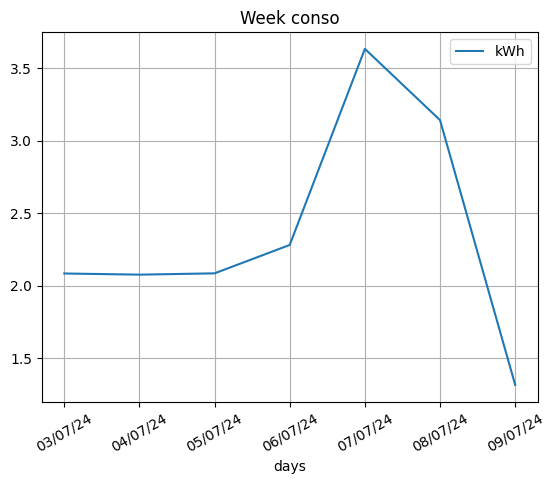

In [532]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [533]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [534]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


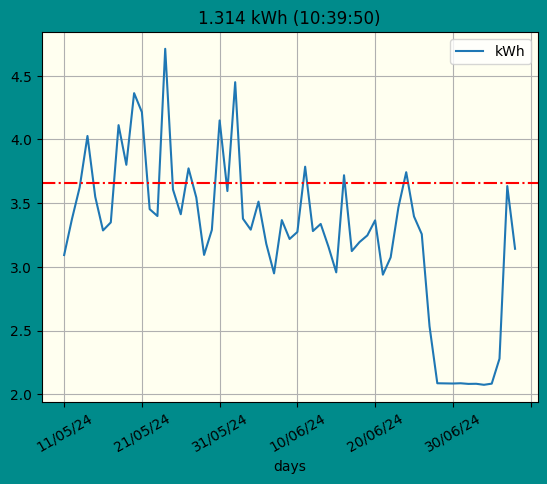

In [535]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [536]:
df_grp.mean()

kWh    3.659806
dtype: float64

In [537]:
#df_grp.head()
df_grp.tail(14)

,kWh
days,
26/06/24,3.257
27/06/24,2.534
28/06/24,2.087
29/06/24,2.086
30/06/24,2.085
01/07/24,2.087
02/07/24,2.082
03/07/24,2.083
04/07/24,2.075


<Axes: xlabel='days'>

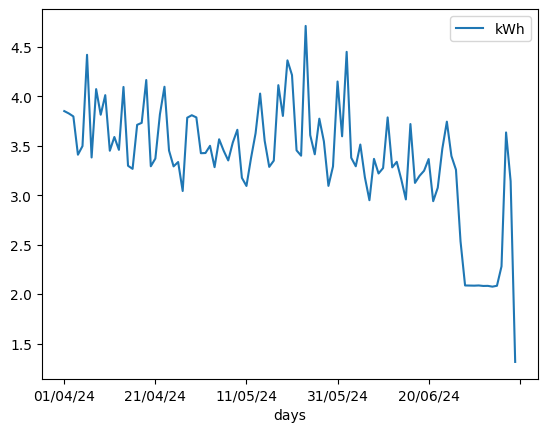

In [556]:
df_grp.tail(100).plot()

In [538]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,2.926633
std,0.600066
min,2.075000
25%,2.135250
50%,3.150000
75%,3.323000
max,3.786000


In [539]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

11/06/24 3.786
04/07/24 2.075


In [540]:
day

'09/07/24'

In [541]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1184463,26227,0.14,26.227,137.263126,27838874180,2024-07-09 00:00:18.109717,09/07/24,0:0:18
1184464,25741,0.14,25.741,139.854706,27838899921,2024-07-09 00:00:43.850717,09/07/24,0:0:43
1184465,24404,0.15,24.404,147.516801,27838924325,2024-07-09 00:01:08.254717,09/07/24,0:1:8
1184466,24666,0.14,24.666,145.949891,27838948991,2024-07-09 00:01:32.920717,09/07/24,0:1:32
1184467,25244,0.14,25.244,142.608145,27838974235,2024-07-09 00:01:58.164717,09/07/24,0:1:58
...,...,...,...,...,...,...,...,...
1185772,18653,0.19,18.653,192.998445,27877155668,2024-07-09 10:38:19.597717,09/07/24,10:38:19
1185773,18483,0.19,18.483,194.773576,27877174151,2024-07-09 10:38:38.080717,09/07/24,10:38:38
1185774,18573,0.19,18.573,193.829753,27877192724,2024-07-09 10:38:56.653717,09/07/24,10:38:56
1185775,17944,0.20,17.944,200.624164,27877210668,2024-07-09 10:39:14.597717,09/07/24,10:39:14


In [542]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 1184463 to 1185776
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1314 non-null   int64         
 1   kWh        1314 non-null   float64       
 2   sec        1314 non-null   float64       
 3   Wh         1314 non-null   float64       
 4   cumul(ms)  1314 non-null   int64         
 5   dates      1314 non-null   datetime64[ns]
 6   days       1314 non-null   object        
 7   heure      1314 non-null   object        
 8   hours      1314 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 102.7+ KB


In [543]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1184463    00  0.14
  1184464    00  0.14
  1184465    00  0.15
  1184466    00  0.14
  1184467    00  0.14
  ...       ...   ...
  1184604    00  0.12
  1184605    00  0.12
  1184606    00  0.12
  1184607    00  0.10
  1184608    00  0.10
  
  [146 rows x 2 columns]),
 ('01',
          hours  kWh
  1184609    01  0.1
  1184610    01  0.1
  1184611    01  0.1
  1184612    01  0.1
  1184613    01  0.1
  ...       ...  ...
  1184721    01  0.1
  1184722    01  0.1
  1184723    01  0.1
  1184724    01  0.1
  1184725    01  0.1
  
  [117 rows x 2 columns]),
 ('02',
          hours  kWh
  1184726    02  0.1
  1184727    02  0.1
  1184728    02  0.1
  1184729    02  0.1
  1184730    02  0.1
  ...       ...  ...
  1184837    02  0.1
  1184838    02  0.1
  1184839    02  0.1
  1184840    02  0.1
  1184841    02  0.1
  
  [116 rows x 2 columns]),
 ('03',
          hours   kWh
  1184842    03  0.10
  1184843    03  0.10
  1184844    03  0.11
  1184845    03  0.10


In [544]:
groupedbyhour.count()

,kWh
hours,
00,146
01,117
02,116
03,118
04,117
05,116
06,114
07,113
08,114


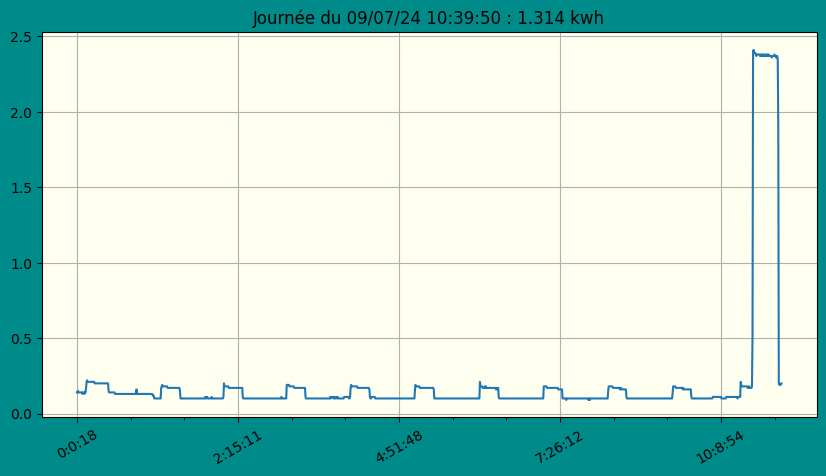

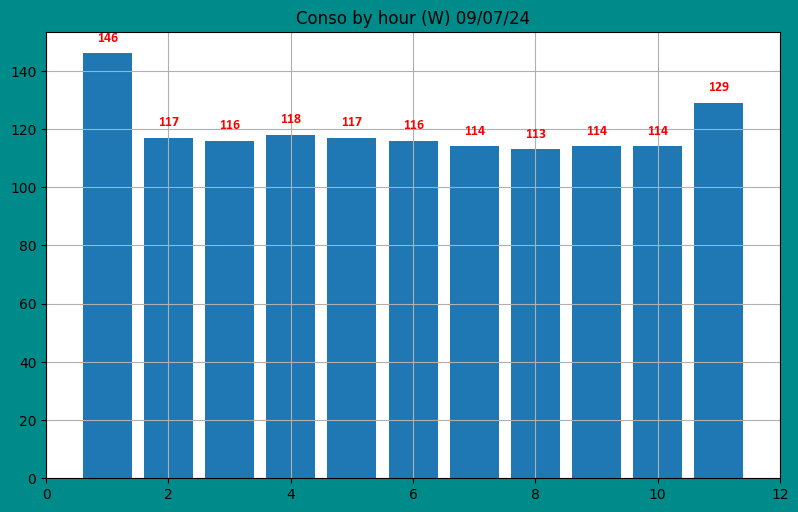

In [545]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [546]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [547]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [548]:
#conso_byhour(day)

In [549]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

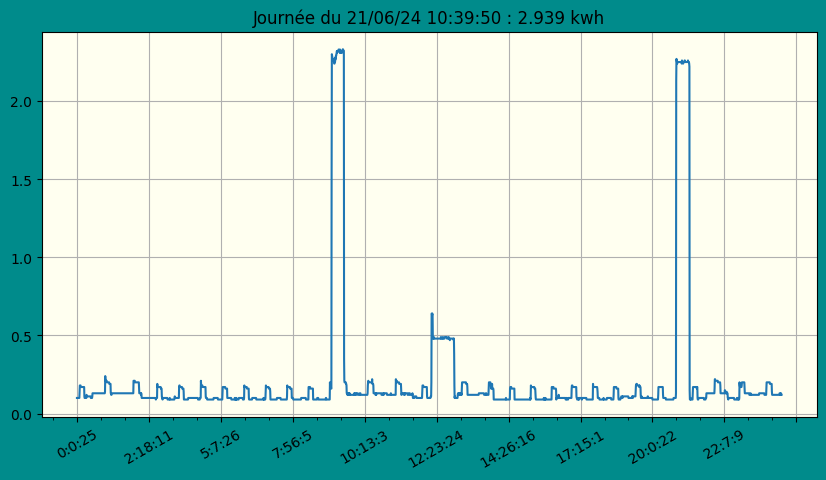

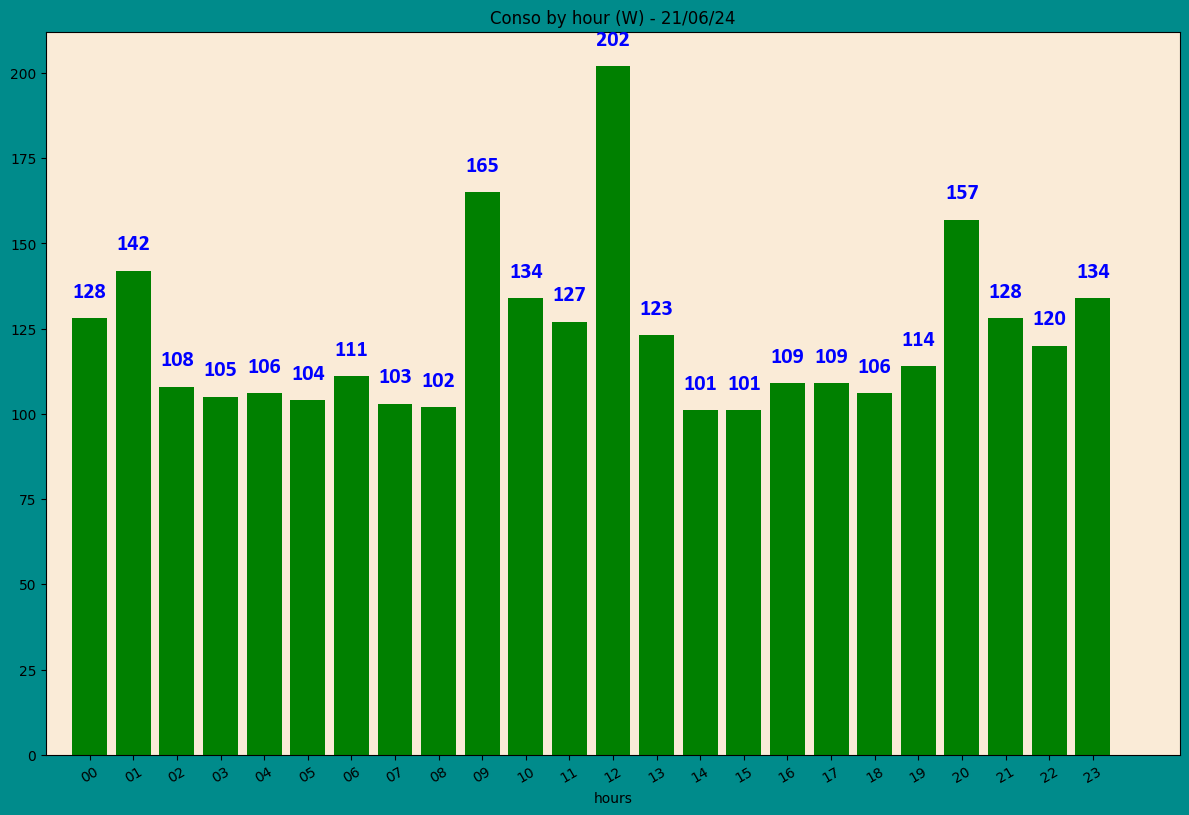

In [550]:
# plot any day
day = '21/06/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

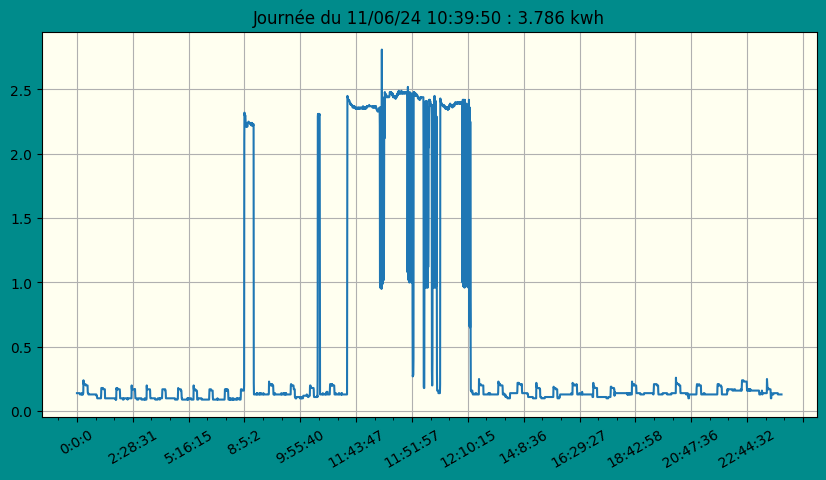

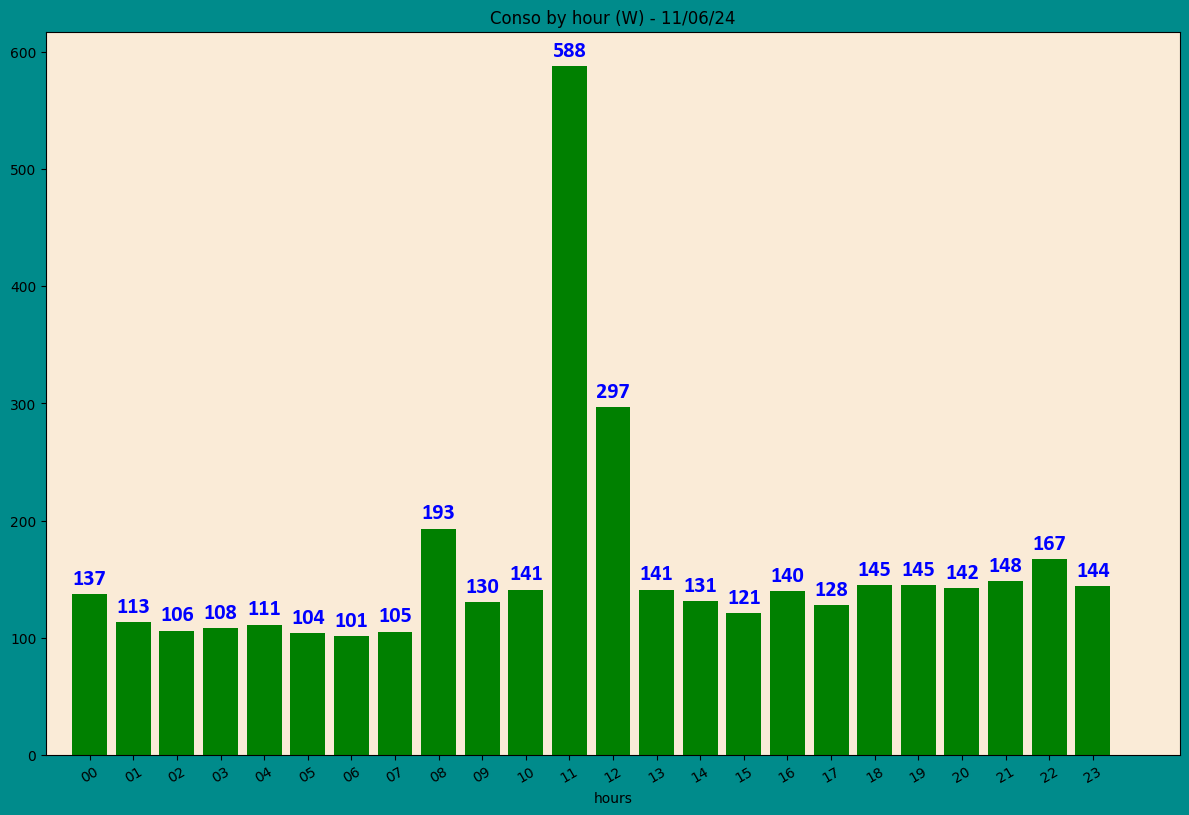

In [551]:
# plot day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [552]:
filename='conso_data.csv'
#conso_data.to_csv(filename)